In [1]:
import gensim
from gensim import corpora,models
from gensim.models import LdaModel
from gensim.test.utils import datapath
from gensim.parsing.preprocessing import remove_stopwords,strip_punctuation, strip_numeric,strip_short, stem_text
import pandas as pd
import unidecode
import csv
import datetime as dt

from wordcloud import WordCloud, STOPWORDS 
from gensim.models import ldaseqmodel

import pyLDAvis
import pyLDAvis.gensim  # don't skip this

import matplotlib.pyplot as plt

In [32]:
filename = "amazon_reviews_us_Beauty_v1_00.tsv"
url = 'https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Beauty_v1_00.tsv.gz'

manual_stopwords = ['use', 'love', 'thing', 'nice', 'little', 'better', 'best', 'got', 'buy', 
                    'come', 'great', 'good', 'like', 'more', 'think. come', 'want', 'going', 'bought', 
                    'came', 'makes', 'thought', 'way', 'actually', 'probably', 'new', 'second',
                   'think', 'tried', 'wonderful', 'tell', 'beat', 'need', 'wanted', 'said', 'perfect', 
                    'maybe', 'trying', 'work', 'try']

a = [] 
with open(filename) as tsvfile:
    reader = csv.reader(tsvfile, delimiter='\t' )
    for row in reader:
        a.append(row)
        break

In [3]:
fdf = pd.read_csv(filename, delimiter='\t', names=a[0], skiprows=[0])
mask = fdf.isnull().sum(axis=1) != 7
fdf = fdf[mask]
fdf["review_date"] = pd.to_datetime(fdf['review_date'],format = "%Y-%m-%d",errors='coerce')
fdf.dropna(inplace=True)
fdf["year"] = fdf["review_date"].map(lambda x: x.year)

/home/ecbm4040/miniconda3/envs/dlenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
#Partition logic
#10000 random entries per year
year_count = fdf.groupby('year')['review_id'].nunique()
years = list(year_count.keys())
years.remove(2000)
df_list = []
thresh = 10000
for year in years:
    temp_df = fdf[fdf["year"] == year]
    if (year_count[year] > thresh):
        temp_df = temp_df.sample(thresh)
    df_list.append(temp_df)    


concat_dfs = []
for i in range(5):
    concat_dfs.append(pd.concat(df_list[3 * i: 3 * i + 3]))
time_slice = [len(i) for i in df_list]

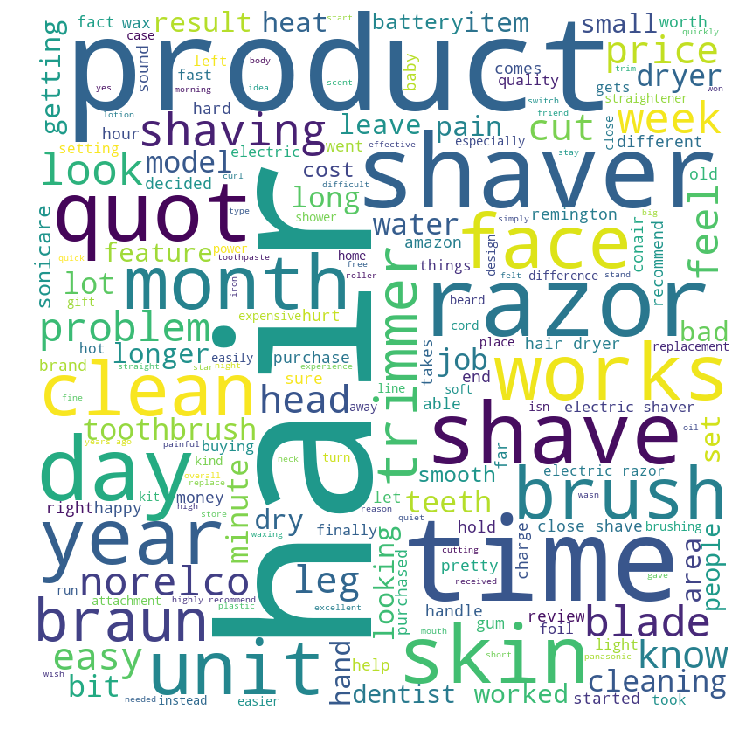

Done for 2001


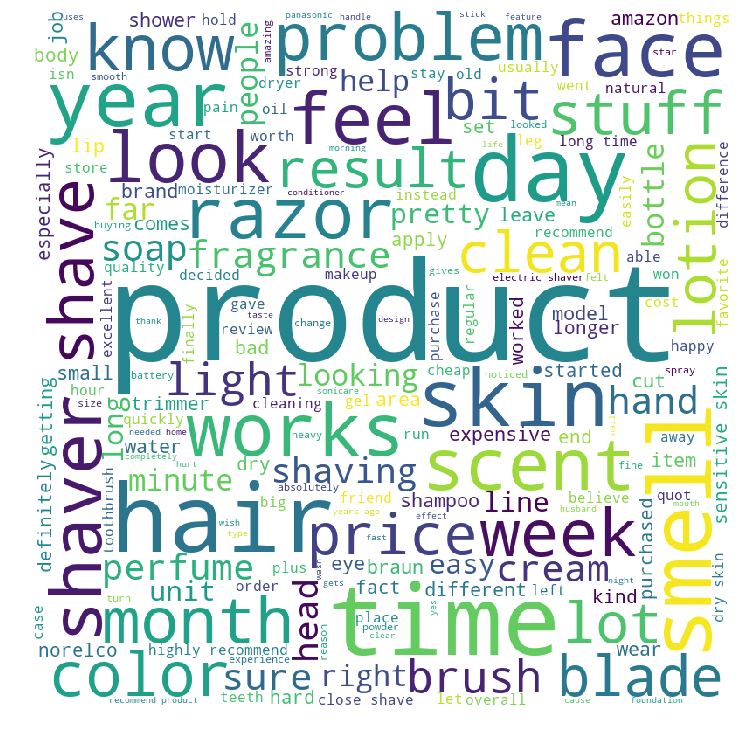

Done for 2004


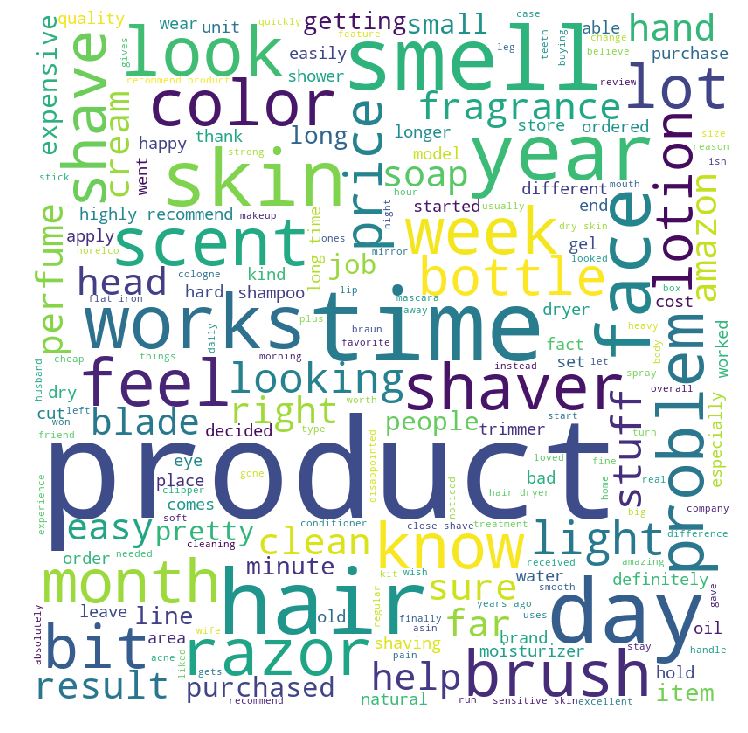

Done for 2007


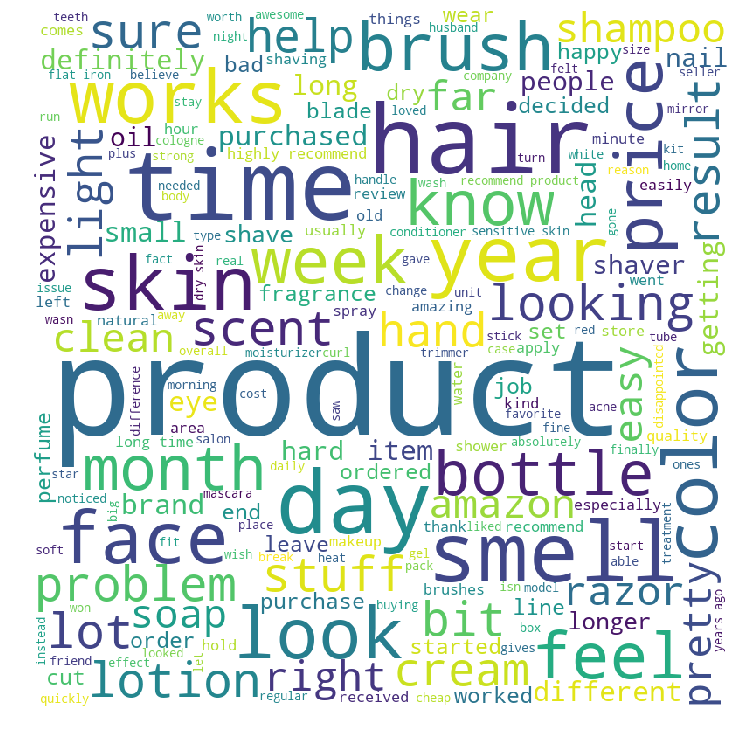

Done for 2010


In [ ]:
stopwords = set(STOPWORDS)
stopwords = stopwords.union(set(manual_stopwords))
wordclouds = []

for df in concat_dfs:
    st_year = str(df.year.iloc[0])
    comment_words = ' '
    for val in df.review_body:
        tokens = strip_short(remove_stopwords(strip_numeric(strip_punctuation(val.lower()))),3).split()
        for words in tokens: 
            comment_words = comment_words + words + ' '
    wordcloud = WordCloud(width = 800, height = 800,background_color ='white', 
                          stopwords = stopwords, min_font_size = 10).generate(comment_words)
    wordclouds.append(wordcloud)
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)
    plt.savefig("wordcloud" + st_year + ".png", bbox_inches='tight')
    plt.show()
    print("Done for " + st_year)